In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [74]:
path_root = "./bash_process/"
path_list = ["apps_moviles", "cuentas_con_transacciones", "cuentas_validadas","montos_procesados","operaciones_realizadas"]
df_apps_moviles = pd.read_csv(path_root+"apps_moviles.csv",encoding='latin-1')
df_cuentas_con_transacciones = pd.read_csv(path_root+"cuentas_con_transacciones.csv",encoding='latin-1')
df_cuentas_validadas = pd.read_csv(path_root+"cuentas_validadas.csv",encoding='latin-1')
df_montos_procesados = pd.read_csv(path_root+"montos_procesados.csv",encoding='latin-1')
df_operaciones_realizadas = pd.read_csv(path_root+"operaciones_realizadas.csv",encoding='latin-1')

In [75]:
df_apps_moviles = df_apps_moviles[["Título","Total de dispositivos Android enrolados","Total de dispositivos iOS enrolados"]]
df_apps_moviles.columns = ["fecha","dispositivos_android","dispositivos_ios"]
df_cuentas_con_transacciones.columns = ["fecha","cuentas_pago","cuentas_cobro"]
df_cuentas_validadas = df_cuentas_validadas[["Título", "Total de cuentas validadas"]]
df_cuentas_validadas.columns = ["fecha","cuentas_validadas"]
df_montos_procesados = df_montos_procesados[["Título",	"Total de monto enviado","Total de monto recibido"]]
df_montos_procesados.columns = ["fecha","monto_enviado","monto_recibido"]
df_operaciones_realizadas = df_operaciones_realizadas[["Título", "Total de operaciones enviadas", "Total de operaciones recibidas"]]
df_operaciones_realizadas.columns = ["fecha", "operaciones_enviadas", "operaciones_recibidas"]

In [76]:
class DataCleaner:
    """
    Clase de limpieza de datasets para diferentes fuentes.
    Cada método recibe un dataframe y devuelve uno limpio.
    """

    @staticmethod
    def clean_apps_moviles(df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y', errors='coerce')
        for col in ['dispositivos_android', 'dispositivos_ios']:
            df[col] = pd.to_numeric(df[col].replace('N/E', np.nan), errors='coerce')
        df = df.sort_values('fecha').reset_index(drop=True)
        return df

    @staticmethod
    def clean_cuentas_con_transacciones(df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y', errors='coerce')
        for col in ['cuentas_pago', 'cuentas_cobro']:
            df[col] = pd.to_numeric(df[col].replace('N/E', np.nan), errors='coerce')
        df = df.sort_values('fecha').reset_index(drop=True)
        return df

    @staticmethod
    def clean_cuentas_validadas(df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y', errors='coerce')
        df['cuentas_validadas'] = pd.to_numeric(df['cuentas_validadas'].replace('N/E', np.nan), errors='coerce')
        df = df.sort_values('fecha').reset_index(drop=True)
        return df

    @staticmethod
    def clean_montos_procesados(df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y', errors='coerce')
        for col in ['monto_enviado', 'monto_recibido']:
            df[col] = pd.to_numeric(df[col].replace('N/E', np.nan), errors='coerce')
        df = df.sort_values('fecha').reset_index(drop=True)
        return df

    @staticmethod
    def clean_operaciones_realizadas(df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y', errors='coerce')
        for col in ['operaciones_enviadas', 'operaciones_recibidas']:
            df[col] = pd.to_numeric(df[col].replace('N/E', np.nan), errors='coerce')
        df = df.sort_values('fecha').reset_index(drop=True)
        return df


In [77]:
df_apps_moviles = DataCleaner.clean_apps_moviles(df_apps_moviles)
df_cuentas_con_transacciones = DataCleaner.clean_cuentas_con_transacciones(df_cuentas_con_transacciones)
df_cuentas_validadas = DataCleaner.clean_cuentas_validadas(df_cuentas_validadas)
df_montos_procesados = DataCleaner.clean_montos_procesados(df_montos_procesados)
df_operaciones_realizadas = DataCleaner.clean_operaciones_realizadas(df_operaciones_realizadas)

# 📊 Exploratory Data Analysis (EDA) - Datos CoDi (Banxico)

## 🧹 Limpiezas Realizadas
- Conversión de columna `fecha` a tipo `datetime`.
- Reemplazo de valores `"N/E"` por `NaN`.
- Conversión de columnas numéricas a `float`.
- Ordenamiento ascendente por fecha.
- Se respetaron las observaciones específicas de cada dataset basadas en la documentación de Banxico.

---

# 📚 Resumen General de los DataFrames

| DataFrame | Tipo de dato | Unidad | Particularidades importantes |
|:----------|:-------------|:-------|:------------------------------|
| `df_apps_moviles` | Volumen acumulado | Dispositivos | Cambio de frecuencia, baja de bancos |
| `df_cuentas_validadas` | Flujos diarios | Cuentas | Altas/bajas, días negativos |
| `df_cuentas_con_transacciones` | Volumen acumulado | Cuentas | SPEI días operativos, días nulos |
| `df_operaciones_realizadas` | Flujos diarios | Operaciones | Preliminar último día, ajustes históricos |
| `df_montos_procesados` | Flujos diarios | Pesos | Preliminar último día, ajustes históricos |

---

# 📋 EDA Detallado por Dataset

## 1. `df_apps_moviles`
**Apps móviles enroladas en CoDi**  
- **Periodo:** 11/11/2019 - 21/04/2025
- **Columnas:** `fecha`, `dispositivos_android`, `dispositivos_ios`
- **Unidad:** Volumen (conteo acumulado)

**Observaciones:**
- Volumen debería incrementar con el tiempo, salvo bajas como la de Banco Famsa (17/dic/2020).
- Entre nov 2019 y mayo 2020, el reporte no era diario.
- Reporte diario desde el 23/mayo/2020.
- Apertura/cierre de SPEI afecta interpretación de días.

**Riesgos:**
- Días planos o con retrocesos por baja de participantes.
- Interpretar bien días no operativos o nulos.

---

## 2. `df_cuentas_validadas`
**Cuentas validadas para generar cobros**  
- **Periodo:** 24/05/2020 - 21/04/2025
- **Columnas:** `fecha`, `cuentas_validadas`
- **Unidad:** Flujos diarios

**Observaciones:**
- Flujo de altas/bajas de cuentas.
- A partir del 8/jun/2020, solo cuentas activas ligadas a dispositivos.
- A partir del 25/ago/2020, se reportan únicamente altas/bajas diarias.

**Riesgos:**
- Cifras negativas representan cuentas desactivadas.
- No hay datos antes del 24/mayo/2020.

---

## 3. `df_cuentas_con_transacciones`
**Cuentas que realizaron al menos una transacción**  
- **Periodo:** 23/10/2019 - 21/04/2025
- **Columnas:** `fecha`, `cuentas_pago`, `cuentas_cobro`
- **Unidad:** Volumen acumulado

**Observaciones:**
- Reporte de cuentas que realizaron pagos o cobros.
- Basado en día operativo SPEI.
- Valores deberían crecer a lo largo del tiempo.

**Riesgos:**
- Nulos en días feriados o no operativos.

---

## 4. `df_operaciones_realizadas`
**Número de operaciones realizadas a través de CoDi**  
- **Periodo:** 30/09/2019 - 21/04/2025
- **Columnas:** `fecha`, `operaciones_enviadas`, `operaciones_recibidas`
- **Unidad:** Flujos diarios

**Observaciones:**
- Mide cantidad de operaciones cada día.
- El último dato de cada año puede ser preliminar.
- Cambios históricos aplicados en marzo 2021.

**Riesgos:**
- Último día debe tratarse con precaución.
- Revisar anomalías por ajustes históricos.

---

## 5. `df_montos_procesados`
**Monto de dinero procesado a través de CoDi**  
- **Periodo:** 30/09/2019 - 21/04/2025
- **Columnas:** `fecha`, `monto_enviado`, `monto_recibido`
- **Unidad:** Pesos mexicanos

**Observaciones:**
- Mide montos procesados diariamente.
- Último dato preliminar.
- Cambios aplicados en marzo 2021.

**Riesgos:**
- Preliminaridad del último registro.
- Análisis de montos atípicos a lo largo del tiempo.

---


In [78]:
def eda_cuantitativo(df, nombre_df):
    
    print(f"\n📄 Análisis del DataFrame: {nombre_df}")
    print("="*60)
    
    # Tamaño
    print(f"➡️  Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    
    # Tipos de datos
    print("\n➡️  Tipos de datos:")
    print(df.dtypes)
    
    # Estadísticas descriptivas
    print("\n➡️  Estadísticas descriptivas:")
    display(df.describe(include='all'))
    
    # Porcentaje de valores nulos
    print("\n➡️  Porcentaje de valores nulos por columna:")
    print((df.isnull().mean() * 100).round(2).astype(str) + " %")
    
    # Fechas mínima y máxima (si existe columna 'fecha')
    if 'fecha' in df.columns:
        print("\n➡️  Rango de fechas:")
        print(f"Desde: {df['fecha'].min()}  Hasta: {df['fecha'].max()}")
    
    print("="*60)

# Ejecución para cada uno de tus DataFrames ya limpios:

eda_cuantitativo(df_apps_moviles, "df_apps_moviles")
eda_cuantitativo(df_cuentas_validadas, "df_cuentas_validadas")
eda_cuantitativo(df_cuentas_con_transacciones, "df_cuentas_con_transacciones")
eda_cuantitativo(df_montos_procesados, "df_montos_procesados")
eda_cuantitativo(df_operaciones_realizadas, "df_operaciones_realizadas")



📄 Análisis del DataFrame: df_apps_moviles
➡️  Dimensiones: 1990 filas × 3 columnas

➡️  Tipos de datos:
fecha                   datetime64[ns]
dispositivos_android           float64
dispositivos_ios               float64
dtype: object

➡️  Estadísticas descriptivas:


,fecha,dispositivos_android,dispositivos_ios
count,1990,1.924000e+03,1.924000e+03
mean,2022-07-31 11:53:29.246231296,1.333739e+07,4.980012e+06
min,2019-11-01 00:00:00,8.372020e+05,2.640120e+05
25%,2021-03-21 06:00:00,8.614876e+06,2.759524e+06
50%,2022-07-31 12:00:00,1.434311e+07,5.079981e+06
75%,2023-12-10 18:00:00,1.886884e+07,7.282193e+06
max,2025-04-21 00:00:00,2.162978e+07,8.903455e+06
std,NaN,6.148249e+06,2.617309e+06



➡️  Porcentaje de valores nulos por columna:
fecha                    0.0 %
dispositivos_android    3.32 %
dispositivos_ios        3.32 %
dtype: object

➡️  Rango de fechas:
Desde: 2019-11-01 00:00:00  Hasta: 2025-04-21 00:00:00

📄 Análisis del DataFrame: df_cuentas_validadas
➡️  Dimensiones: 1789 filas × 2 columnas

➡️  Tipos de datos:
fecha                datetime64[ns]
cuentas_validadas             int64
dtype: object

➡️  Estadísticas descriptivas:


,fecha,cuentas_validadas
count,1789,1.789000e+03
mean,2022-11-05 15:34:30.653996800,1.035481e+04
min,2020-05-24 00:00:00,-1.074098e+06
25%,2021-08-14 00:00:00,5.465000e+03
50%,2022-11-04 00:00:00,1.020700e+04
75%,2024-01-30 00:00:00,1.305100e+04
max,2025-04-21 00:00:00,1.101437e+06
std,NaN,3.752963e+04



➡️  Porcentaje de valores nulos por columna:
fecha                0.0 %
cuentas_validadas    0.0 %
dtype: object

➡️  Rango de fechas:
Desde: 2020-05-24 00:00:00  Hasta: 2025-04-21 00:00:00

📄 Análisis del DataFrame: df_cuentas_con_transacciones
➡️  Dimensiones: 2008 filas × 3 columnas

➡️  Tipos de datos:
fecha            datetime64[ns]
cuentas_pago            float64
cuentas_cobro           float64
dtype: object

➡️  Estadísticas descriptivas:


,fecha,cuentas_pago,cuentas_cobro
count,2008,1.833000e+03,1.833000e+03
mean,2022-07-22 12:00:00.000000256,1.138851e+06,6.981729e+05
min,2019-10-23 00:00:00,1.908900e+04,1.771700e+04
25%,2021-03-07 18:00:00,5.834110e+05,5.048980e+05
50%,2022-07-22 12:00:00,1.103705e+06,7.690880e+05
75%,2023-12-06 06:00:00,1.729540e+06,9.795260e+05
max,2025-04-21 00:00:00,2.323772e+06,1.070218e+06
std,NaN,6.764470e+05,3.158354e+05



➡️  Porcentaje de valores nulos por columna:
fecha             0.0 %
cuentas_pago     8.72 %
cuentas_cobro    8.72 %
dtype: object

➡️  Rango de fechas:
Desde: 2019-10-23 00:00:00  Hasta: 2025-04-21 00:00:00

📄 Análisis del DataFrame: df_montos_procesados
➡️  Dimensiones: 2031 filas × 3 columnas

➡️  Tipos de datos:
fecha             datetime64[ns]
monto_enviado              int64
monto_recibido             int64
dtype: object

➡️  Estadísticas descriptivas:


,fecha,monto_enviado,monto_recibido
count,2031,2.031000e+03,2.031000e+03
mean,2022-07-11 00:00:00,7.492459e+06,7.492459e+06
min,2019-09-30 00:00:00,1.638720e+05,1.638720e+05
25%,2021-02-18 12:00:00,3.442562e+06,3.442562e+06
50%,2022-07-11 00:00:00,6.058099e+06,6.058099e+06
75%,2023-11-30 12:00:00,1.075087e+07,1.075087e+07
max,2025-04-21 00:00:00,7.019612e+07,7.019612e+07
std,NaN,5.772979e+06,5.772979e+06



➡️  Porcentaje de valores nulos por columna:
fecha             0.0 %
monto_enviado     0.0 %
monto_recibido    0.0 %
dtype: object

➡️  Rango de fechas:
Desde: 2019-09-30 00:00:00  Hasta: 2025-04-21 00:00:00

📄 Análisis del DataFrame: df_operaciones_realizadas
➡️  Dimensiones: 2031 filas × 3 columnas

➡️  Tipos de datos:
fecha                    datetime64[ns]
operaciones_enviadas              int64
operaciones_recibidas             int64
dtype: object

➡️  Estadísticas descriptivas:


,fecha,operaciones_enviadas,operaciones_recibidas
count,2031,2031.000000,2031.000000
mean,2022-07-11 00:00:00,7938.633678,7938.633678
min,2019-09-30 00:00:00,432.000000,432.000000
25%,2021-02-18 12:00:00,4008.000000,4008.000000
50%,2022-07-11 00:00:00,7612.000000,7612.000000
75%,2023-11-30 12:00:00,11435.500000,11435.500000
max,2025-04-21 00:00:00,22780.000000,22780.000000
std,NaN,4512.174557,4512.174557



➡️  Porcentaje de valores nulos por columna:
fecha                    0.0 %
operaciones_enviadas     0.0 %
operaciones_recibidas    0.0 %
dtype: object

➡️  Rango de fechas:
Desde: 2019-09-30 00:00:00  Hasta: 2025-04-21 00:00:00


In [79]:
def plot_evolucion(df, columnas, titulo, ylabel, xlabel="Fecha", figsize=(10,4)):
    """
    Grafica evolución temporal de una o más columnas de un dataframe.
    """
    plt.figure(figsize=figsize)
    for col in columnas:
        sns.lineplot(data=df, x='fecha', y=col, label=col)

    plt.title(titulo, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


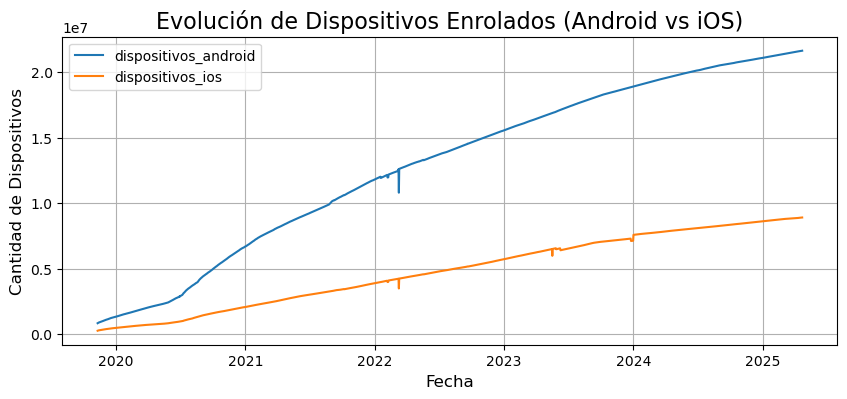

In [80]:
plot_evolucion(
    df_apps_moviles,
    columnas=['dispositivos_android', 'dispositivos_ios'],
    titulo="Evolución de Dispositivos Enrolados (Android vs iOS)",
    ylabel="Cantidad de Dispositivos"
)




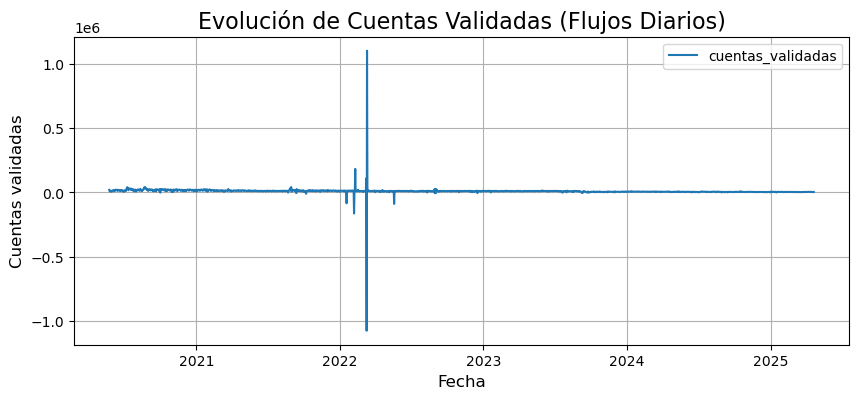

In [81]:
plot_evolucion(
    df_cuentas_validadas,
    columnas=['cuentas_validadas'],
    titulo="Evolución de Cuentas Validadas (Flujos Diarios)",
    ylabel="Cuentas validadas"
)

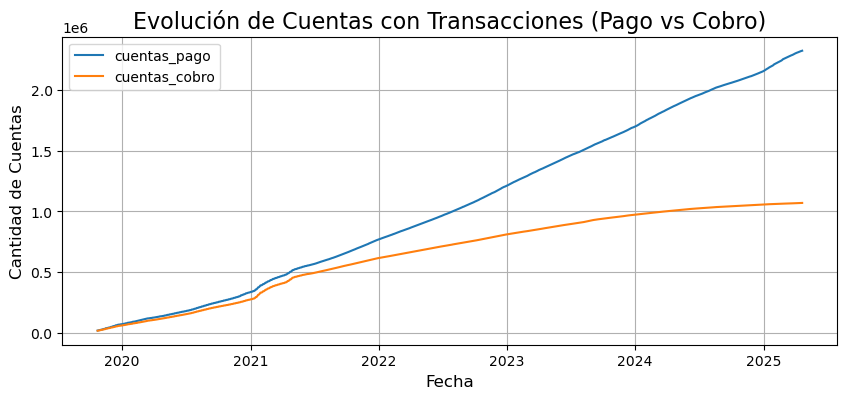

In [82]:
plot_evolucion(
    df_cuentas_con_transacciones,
    columnas=['cuentas_pago', 'cuentas_cobro'],
    titulo="Evolución de Cuentas con Transacciones (Pago vs Cobro)",
    ylabel="Cantidad de Cuentas"
)

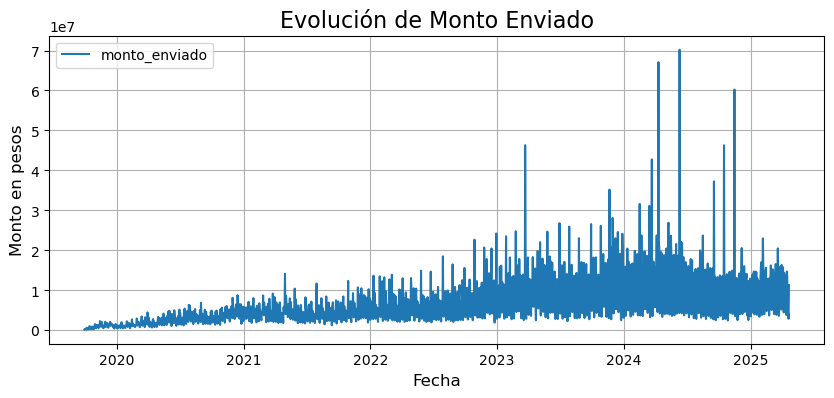

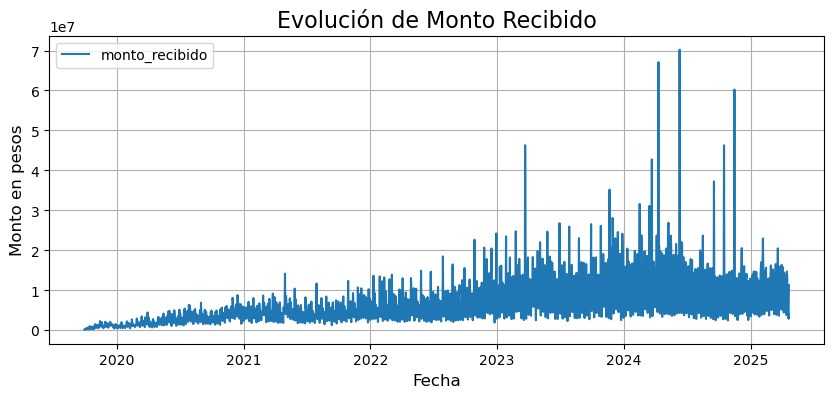

In [83]:
# Gráfica separada: Monto Enviado
plot_evolucion(
    df_montos_procesados,
    columnas=['monto_enviado'],
    titulo="Evolución de Monto Enviado",
    ylabel="Monto en pesos"
)

# Gráfica separada: Monto Recibido
plot_evolucion(
    df_montos_procesados,
    columnas=['monto_recibido'],
    titulo="Evolución de Monto Recibido",
    ylabel="Monto en pesos"
)



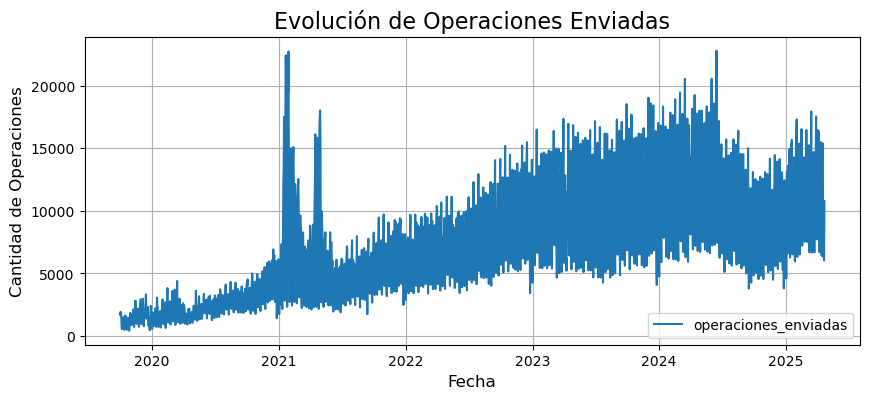

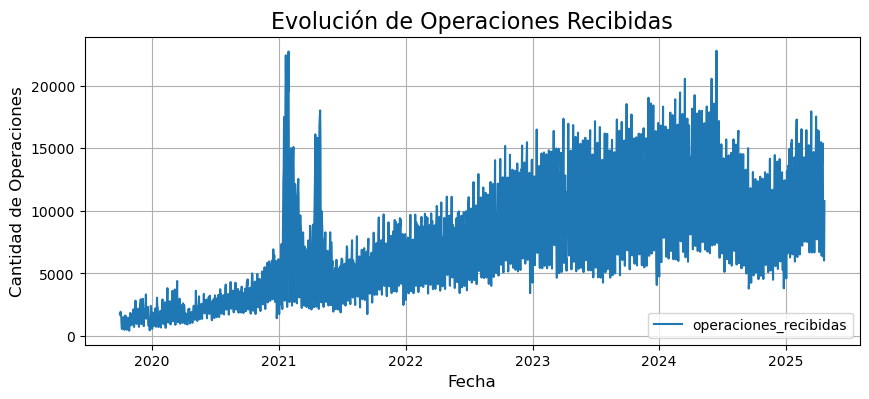

In [85]:
# Gráfica separada: Operaciones Enviadas
plot_evolucion(
    df_operaciones_realizadas,
    columnas=['operaciones_enviadas'],
    titulo="Evolución de Operaciones Enviadas",
    ylabel="Cantidad de Operaciones"
)

# Gráfica separada: Operaciones Recibidas
plot_evolucion(
    df_operaciones_realizadas,
    columnas=['operaciones_recibidas'],
    titulo="Evolución de Operaciones Recibidas",
    ylabel="Cantidad de Operaciones"
)


# 📈 Interpretación de Gráficas de Evolución Temporal

---

## 1. Evolución de Dispositivos Enrolados (Android vs iOS)

**Qué observamos:**
- Crecimiento muy estable y sostenido en Android.
- Crecimiento de iOS también constante, pero siempre mucho más bajo que Android.
- Pequeños saltos negativos en ambos sistemas (posiblemente bajas de bancos como Banco Famsa en 2020).
- Después del 2023, la tasa de crecimiento parece desacelerar ligeramente.

**Ideas de análisis:**
- Analizar la proporción Android/iOS a lo largo del tiempo.
- Verificar si eventos como la baja de bancos afectaron la tendencia.

---

## 2. Evolución de Cuentas Validadas (Flujos Diarios)

**Qué observamos:**
- Picos positivos y negativos extremos.
- Flujos diarios normales son bajos, pero hay eventos de altísima volatilidad.

**Ideas de análisis:**
- Identificar días de alta variabilidad para entender si son cambios operativos o eventos especiales.
- Separar en días normales vs días anómalos.
- Aplicar smoothing o filtros para analizar la tendencia base.

---

## 3. Evolución de Cuentas con Transacciones (Pago vs Cobro)

**Qué observamos:**
- Crecimiento sostenido tanto en pagos como cobros.
- Siempre hay más cuentas que realizan pagos que cobros.
- Ligera reducción en la pendiente de crecimiento después de 2023.

**Ideas de análisis:**
- Analizar tasa de crecimiento anual.
- Verificar estacionalidades en pagos y cobros.
- Analizar efectos regulatorios o de mercado.

---

## 4. Evolución de Montos Procesados


### 4.1 Monto Enviado

**Qué observamos:**
- Tendencia creciente fuerte hasta 2024.
- Picos de altísima volatilidad.

**Ideas de análisis:**
- Revisar eventos asociados a picos de alto volumen (Hot Sale, Buen Fin, promociones).

### 4.2 Monto Recibido

**Qué observamos:**
- Evolución similar al monto enviado, pero requiere verlo separado para no "aplastar" la escala.
- En general sigue la misma tendencia que el monto enviado.

**Ideas de análisis:**
- Análisis de simetría entre montos enviados vs montos recibidos.

---

## 5. Evolución de Operaciones Realizadas

### 5.1 Operaciones Enviadas

**Qué observamos:**
- Crecimiento fuerte hasta 2023.
- Ligera disminución de operaciones en 2024-2025.

**Ideas de análisis:**
- Investigar la razón detrás de la caída: ¿saturación de mercado?, ¿reducción de actividad?

### 5.2 Operaciones Recibidas

**Qué observamos:**
- Evolución muy parecida a las operaciones enviadas.
- Mantiene alta correlación, como debería esperarse.

**Ideas de análisis:**
- Revisar si en algunos periodos la recepción es desproporcionada respecto al envío.

---


1. 📈 Análisis Dispositivos Android vs iOS

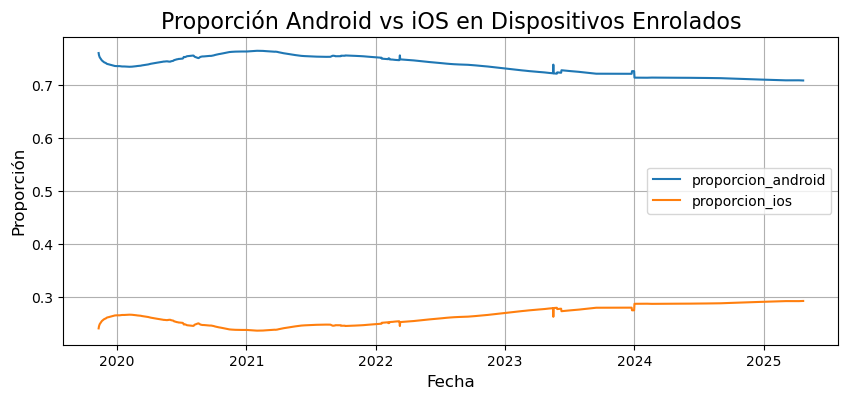

/var/folders/xv/_t61hd6d6fg3g4z034fpcpbr0000gn/T/ipykernel_13531/1413177225.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_android_mensual = df_apps_moviles.resample('M', on='fecha').last()


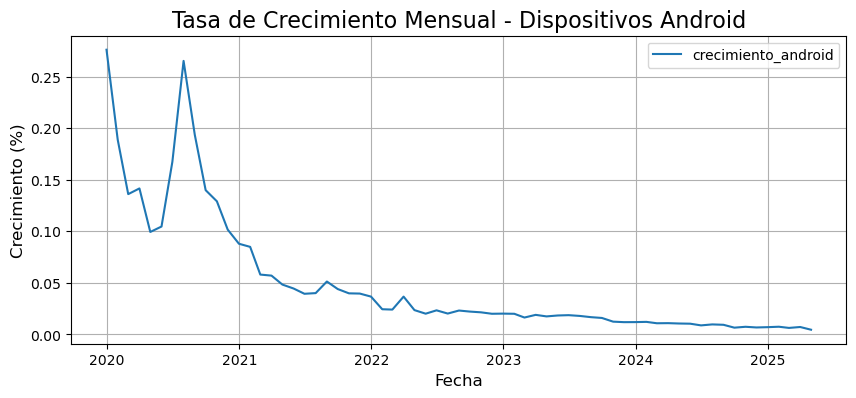

In [86]:
# Proporción de Android vs iOS
df_apps_moviles['proporcion_android'] = df_apps_moviles['dispositivos_android'] / (df_apps_moviles['dispositivos_android'] + df_apps_moviles['dispositivos_ios'])
df_apps_moviles['proporcion_ios'] = df_apps_moviles['dispositivos_ios'] / (df_apps_moviles['dispositivos_android'] + df_apps_moviles['dispositivos_ios'])

plot_evolucion(
    df_apps_moviles,
    columnas=['proporcion_android', 'proporcion_ios'],
    titulo="Proporción Android vs iOS en Dispositivos Enrolados",
    ylabel="Proporción"
)

# Tasa de crecimiento mensual (Android)
df_android_mensual = df_apps_moviles.resample('M', on='fecha').last()
df_android_mensual['crecimiento_android'] = df_android_mensual['dispositivos_android'].pct_change()

plot_evolucion(
    df_android_mensual,
    columnas=['crecimiento_android'],
    titulo="Tasa de Crecimiento Mensual - Dispositivos Android",
    ylabel="Crecimiento (%)"
)


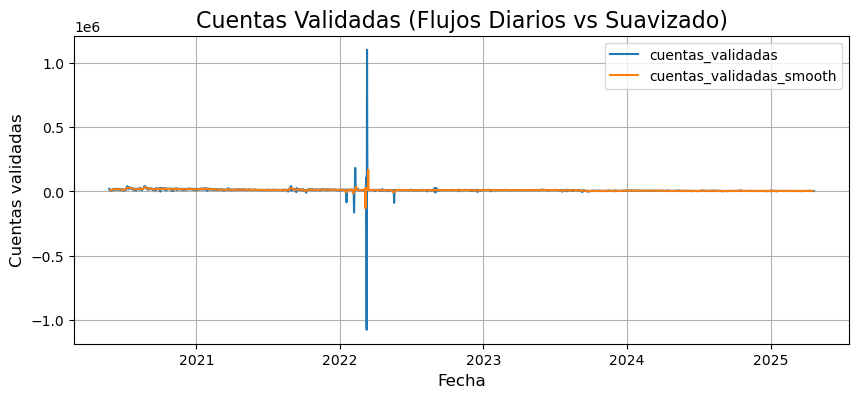

📈 Outliers detectados en Cuentas Validadas:


,fecha,cuentas_validadas,cuentas_validadas_smooth
45,2020-07-08,34285,26661.285714
46,2020-07-09,41212,27626.000000
47,2020-07-10,30906,28932.428571
48,2020-07-11,24734,30023.000000
50,2020-07-13,31638,27696.000000
51,2020-07-14,30271,27675.142857
52,2020-07-15,29659,27279.857143
53,2020-07-16,29549,27462.000000
54,2020-07-17,30760,27004.000000
57,2020-07-20,28432,25396.142857


In [87]:
# Media móvil (smoothing) para ver tendencia base
df_cuentas_validadas['cuentas_validadas_smooth'] = df_cuentas_validadas['cuentas_validadas'].rolling(window=7, center=True).mean()

plot_evolucion(
    df_cuentas_validadas,
    columnas=['cuentas_validadas', 'cuentas_validadas_smooth'],
    titulo="Cuentas Validadas (Flujos Diarios vs Suavizado)",
    ylabel="Cuentas validadas"
)

# Detección de outliers usando IQR
Q1 = df_cuentas_validadas['cuentas_validadas'].quantile(0.25)
Q3 = df_cuentas_validadas['cuentas_validadas'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_cuentas_validadas[
    (df_cuentas_validadas['cuentas_validadas'] < (Q1 - 1.5 * IQR)) |
    (df_cuentas_validadas['cuentas_validadas'] > (Q3 + 1.5 * IQR))
]

print("📈 Outliers detectados en Cuentas Validadas:")
display(outliers)


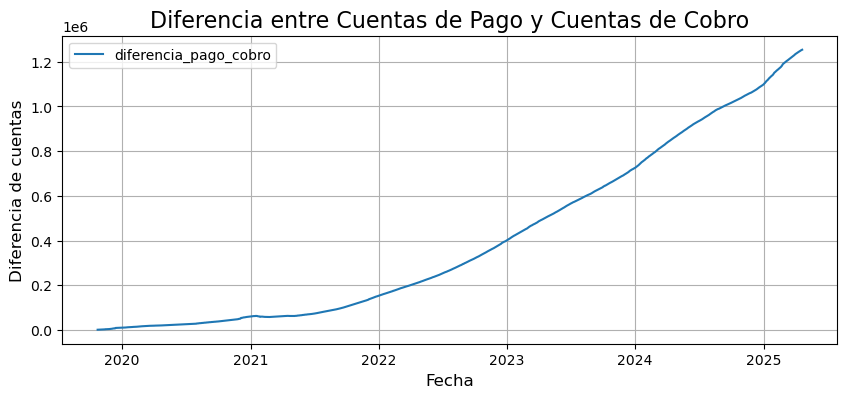

In [89]:
# Diferencia entre cuentas de pago y cuentas de cobro
df_cuentas_con_transacciones['diferencia_pago_cobro'] = df_cuentas_con_transacciones['cuentas_pago'] - df_cuentas_con_transacciones['cuentas_cobro']

plot_evolucion(
    df_cuentas_con_transacciones,
    columnas=['diferencia_pago_cobro'],
    titulo="Diferencia entre Cuentas de Pago y Cuentas de Cobro",
    ylabel="Diferencia de cuentas"
)


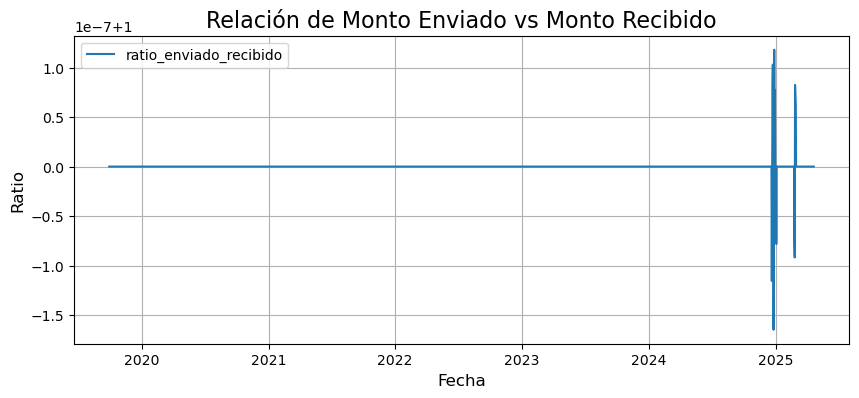

In [90]:
# Ratio monto enviado/recibido
df_montos_procesados['ratio_enviado_recibido'] = df_montos_procesados['monto_enviado'] / df_montos_procesados['monto_recibido']

plot_evolucion(
    df_montos_procesados,
    columnas=['ratio_enviado_recibido'],
    titulo="Relación de Monto Enviado vs Monto Recibido",
    ylabel="Ratio"
)


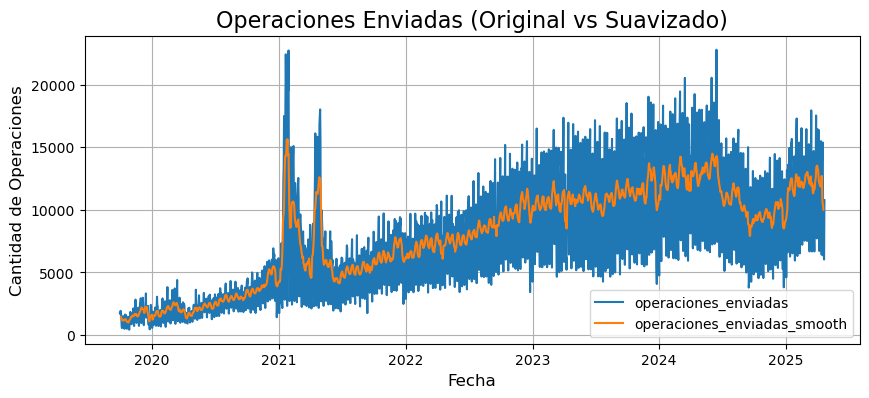

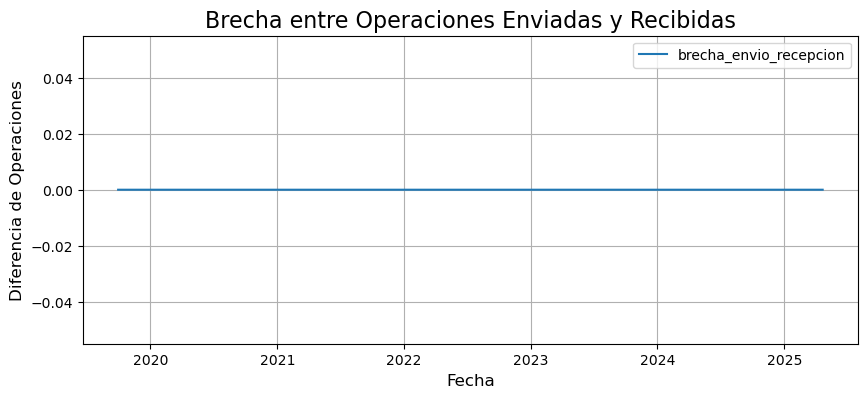

In [91]:
# Moving average (media móvil) operaciones enviadas
df_operaciones_realizadas['operaciones_enviadas_smooth'] = df_operaciones_realizadas['operaciones_enviadas'].rolling(window=7, center=True).mean()

plot_evolucion(
    df_operaciones_realizadas,
    columnas=['operaciones_enviadas', 'operaciones_enviadas_smooth'],
    titulo="Operaciones Enviadas (Original vs Suavizado)",
    ylabel="Cantidad de Operaciones"
)

# Brecha entre operaciones enviadas y recibidas
df_operaciones_realizadas['brecha_envio_recepcion'] = df_operaciones_realizadas['operaciones_enviadas'] - df_operaciones_realizadas['operaciones_recibidas']

plot_evolucion(
    df_operaciones_realizadas,
    columnas=['brecha_envio_recepcion'],
    titulo="Brecha entre Operaciones Enviadas y Recibidas",
    ylabel="Diferencia de Operaciones"
)


In [92]:
import pandas as pd

class DataFrameValidator:
    """
    Clase de validaciones automáticas para DataFrames de CoDi.
    """

    @staticmethod
    def validar_fechas_completas(df, start_date=None, end_date=None):
        """
        Valida que las fechas en el DataFrame sean continuas (diarias).
        """
        fechas = pd.date_range(start=start_date or df['fecha'].min(), end=end_date or df['fecha'].max(), freq='D')
        fechas_faltantes = fechas.difference(df['fecha'])
        
        if len(fechas_faltantes) == 0:
            print("✅ Fechas completas. No faltan días.")
        else:
            print(f"❌ Faltan {len(fechas_faltantes)} fechas:")
            print(fechas_faltantes)
        
        return fechas_faltantes

    @staticmethod
    def validar_acumulado_creciente(df, columna):
        """
        Valida que los datos de una columna acumulativa no decrezcan.
        """
        diferencias = df[columna].diff().dropna()
        decrecimientos = diferencias[diferencias < 0]
        
        if decrecimientos.empty:
            print(f"✅ {columna}: No hay decrecimientos, acumulado correcto.")
        else:
            print(f"❌ {columna}: Se encontraron {decrecimientos.count()} decrecimientos.")
            display(decrecimientos)
        
        return decrecimientos

    @staticmethod
    def validar_valores_negativos(df, columnas):
        """
        Valida que en las columnas especificadas no existan valores negativos.
        """
        negativos = {}
        
        for col in columnas:
            negativos_columna = df[df[col] < 0]
            if not negativos_columna.empty:
                print(f"❌ {col}: Se encontraron valores negativos.")
                negativos[col] = negativos_columna
            else:
                print(f"✅ {col}: No se encontraron valores negativos.")
        
        return negativos


In [93]:
DataFrameValidator.validar_fechas_completas(df_apps_moviles)
DataFrameValidator.validar_fechas_completas(df_cuentas_validadas)
DataFrameValidator.validar_fechas_completas(df_cuentas_con_transacciones)
DataFrameValidator.validar_fechas_completas(df_montos_procesados)
DataFrameValidator.validar_fechas_completas(df_operaciones_realizadas)

❌ Faltan 9 fechas:
DatetimeIndex(['2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
               '2019-11-10'],
              dtype='datetime64[ns]', freq='D')
❌ Faltan 5 fechas:
DatetimeIndex(['2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-09'],
              dtype='datetime64[ns]', freq='D')
✅ Fechas completas. No faltan días.
✅ Fechas completas. No faltan días.
✅ Fechas completas. No faltan días.


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [94]:
DataFrameValidator.validar_acumulado_creciente(df_apps_moviles, 'dispositivos_android')
DataFrameValidator.validar_acumulado_creciente(df_apps_moviles, 'dispositivos_ios')
DataFrameValidator.validar_acumulado_creciente(df_cuentas_con_transacciones, 'cuentas_pago')
DataFrameValidator.validar_acumulado_creciente(df_cuentas_con_transacciones, 'cuentas_cobro')


❌ dispositivos_android: Se encontraron 9 decrecimientos.


233      -17719.0
669       -8188.0
697       -7753.0
800      -97811.0
819     -195273.0
851    -1789608.0
908       -1925.0
921      -28586.0
1046      -7302.0
Name: dispositivos_android, dtype: float64

❌ dispositivos_ios: Se encontraron 11 decrecimientos.


233      -6213.0
685     -12916.0
697     -12278.0
819    -100697.0
851    -743856.0
921      -6728.0
1046     -3393.0
1284   -515958.0
1295    -76539.0
1307   -149321.0
1506   -178511.0
Name: dispositivos_ios, dtype: float64

✅ cuentas_pago: No hay decrecimientos, acumulado correcto.
✅ cuentas_cobro: No hay decrecimientos, acumulado correcto.


Series([], Name: cuentas_cobro, dtype: float64)

In [95]:
DataFrameValidator.validar_valores_negativos(
    df_montos_procesados,
    columnas=['monto_enviado', 'monto_recibido']
)

DataFrameValidator.validar_valores_negativos(
    df_operaciones_realizadas,
    columnas=['operaciones_enviadas', 'operaciones_recibidas']
)

DataFrameValidator.validar_valores_negativos(
    df_apps_moviles,
    columnas=['dispositivos_android', 'dispositivos_ios']
)


✅ monto_enviado: No se encontraron valores negativos.
✅ monto_recibido: No se encontraron valores negativos.
✅ operaciones_enviadas: No se encontraron valores negativos.
✅ operaciones_recibidas: No se encontraron valores negativos.
✅ dispositivos_android: No se encontraron valores negativos.
✅ dispositivos_ios: No se encontraron valores negativos.


{}

In [97]:
def rellenar_fechas(df, start_date=None, end_date=None):
    """
    Rellena fechas faltantes en un DataFrame sin inventar datos. Solo inserta fechas con NaN.
    """
    rango_fechas = pd.date_range(
        start=start_date or df['fecha'].min(),
        end=end_date or df['fecha'].max(),
        freq='D'
    )
    df_completo = df.set_index('fecha').reindex(rango_fechas).reset_index()
    df_completo = df_completo.rename(columns={'index': 'fecha'})
    return df_completo


In [98]:
# Solo aplicamos rellenado donde detectamos fechas faltantes
df_apps_moviles = rellenar_fechas(df_apps_moviles)
df_cuentas_con_transacciones = rellenar_fechas(df_cuentas_con_transacciones)

# Estos no necesitan relleno porque ya pasaron la validación:
# df_cuentas_validadas
# df_montos_procesados
# df_operaciones_realizadas


**"Se rellenaron las fechas faltantes en df_apps_moviles y df_cuentas_con_transacciones debido a días no operativos en la fase inicial del reporte o cierres operativos de SPEI. No se generaron datos artificiales, los valores para esos días quedaron como NaN para mantener la continuidad del eje temporal."**

In [100]:
# Ahora hacemos merges por 'fecha'
df_final = df_apps_moviles.merge(df_cuentas_validadas, on='fecha', how='outer') \
                          .merge(df_cuentas_con_transacciones, on='fecha', how='outer') \
                          .merge(df_montos_procesados, on='fecha', how='outer') \
                          .merge(df_operaciones_realizadas, on='fecha', how='outer')

# Ordenar fechas
df_final = df_final.sort_values('fecha').reset_index(drop=True)

# Visualizar
print("✅ DataFrame Final preparado:")
display(df_final)


✅ DataFrame Final preparado:


,fecha,dispositivos_android,dispositivos_ios,proporcion_android,proporcion_ios,cuentas_validadas,cuentas_validadas_smooth,cuentas_pago,cuentas_cobro,diferencia_pago_cobro,monto_enviado,monto_recibido,ratio_enviado_recibido,operaciones_enviadas,operaciones_recibidas,operaciones_enviadas_smooth,brecha_envio_recepcion
0,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187009,187009,1.0,1747,1747,NaN,0
1,2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311813,311813,1.0,1675,1675,NaN,0
2,2019-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360606,360606,1.0,1943,1943,NaN,0
3,2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399780,399780,1.0,1759,1759,1432.428571,0
4,2019-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398796,398796,1.0,1554,1554,1353.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2025-04-17,21614477.0,8894554.0,0.708462,0.291538,4334.0,4161.857143,2320255.0,1069898.0,1250357.0,9027247,9027247,1.0,10097,10097,10411.285714,0
2027,2025-04-18,21618185.0,8896492.0,0.708452,0.291548,3641.0,4087.857143,2321102.0,1069985.0,1251117.0,3672034,3672034,1.0,6373,6373,10015.571429,0
2028,2025-04-19,21621479.0,8898324.0,0.708441,0.291559,3334.0,NaN,2321841.0,1070052.0,1251789.0,4312447,4312447,1.0,6390,6390,NaN,0
2029,2025-04-20,21624539.0,8900136.0,0.708428,0.291572,3178.0,NaN,2322561.0,1070125.0,1252436.0,2906096,2906096,1.0,6038,6038,NaN,0


In [101]:
# Copia del dataframe final para trabajar seguro
df_final_clean = df_final.copy()

# Columnas donde tiene sentido rellenar NaN con 0
columnas_a_rellenar = [
    'monto_enviado', 'monto_recibido',
    'operaciones_enviadas', 'operaciones_recibidas'
]

# Rellenar solo esas columnas
df_final_clean[columnas_a_rellenar] = df_final_clean[columnas_a_rellenar].fillna(0)

print("✅ Se rellenaron NaN en montos y operaciones con 0 (cuando aplicaba).")
display(df_final_clean.head())


✅ Se rellenaron NaN en montos y operaciones con 0 (cuando aplicaba).


,fecha,dispositivos_android,dispositivos_ios,proporcion_android,proporcion_ios,cuentas_validadas,cuentas_validadas_smooth,cuentas_pago,cuentas_cobro,diferencia_pago_cobro,monto_enviado,monto_recibido,ratio_enviado_recibido,operaciones_enviadas,operaciones_recibidas,operaciones_enviadas_smooth,brecha_envio_recepcion
0,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187009,187009,1.0,1747,1747,NaN,0
1,2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311813,311813,1.0,1675,1675,NaN,0
2,2019-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360606,360606,1.0,1943,1943,NaN,0
3,2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399780,399780,1.0,1759,1759,1432.428571,0
4,2019-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398796,398796,1.0,1554,1554,1353.428571,0


**"Se rellenaron valores nulos en montos enviados, montos recibidos, operaciones enviadas y operaciones recibidas con 0 para mantener coherencia en días donde no hubo actividad, como feriados SPEI. No se alteraron las columnas relacionadas a dispositivos o cuentas validadas para respetar su evolución real."**

In [103]:


# Seleccionamos solo las columnas numéricas relevantes
columnas_numericas = [
    'dispositivos_android', 'dispositivos_ios',
    'cuentas_validadas',
    'cuentas_pago', 'cuentas_cobro',
    'monto_enviado', 'monto_recibido',
    'operaciones_enviadas', 'operaciones_recibidas'
]

df_stats = df_final_clean[columnas_numericas].describe().T
df_stats['varianza'] = df_final_clean[columnas_numericas].var()
df_stats['skewness'] = df_final_clean[columnas_numericas].skew()
df_stats['kurtosis'] = df_final_clean[columnas_numericas].kurt()

print("📊 Estadísticas Descriptivas del DataFrame:")
display(df_stats)


📊 Estadísticas Descriptivas del DataFrame:


,count,mean,std,min,25%,50%,75%,max,varianza,skewness,kurtosis
dispositivos_android,1924.0,1.333739e+07,6.148249e+06,837202.0,8614876.50,14343112.0,18868842.00,21629785.0,3.780096e+13,-0.451940,-0.991428
dispositivos_ios,1924.0,4.980012e+06,2.617309e+06,264012.0,2759523.75,5079981.0,7282193.25,8903455.0,6.850306e+12,-0.154575,-1.262473
cuentas_validadas,1789.0,1.035481e+04,3.752963e+04,-1074098.0,5465.00,10207.0,13051.00,1101437.0,1.408473e+09,0.244175,789.703708
cuentas_pago,1833.0,1.138851e+06,6.764470e+05,19089.0,583411.00,1103705.0,1729540.00,2323772.0,4.575805e+11,0.042083,-1.210957
cuentas_cobro,1833.0,6.981729e+05,3.158354e+05,17717.0,504898.00,769088.0,979526.00,1070218.0,9.975201e+10,-0.671798,-0.760547
monto_enviado,2031.0,7.492459e+06,5.772979e+06,163872.0,3442562.50,6058099.0,10750871.00,70196115.0,3.332729e+13,2.690601,18.508712
monto_recibido,2031.0,7.492459e+06,5.772979e+06,163872.0,3442562.50,6058099.0,10750871.00,70196115.0,3.332729e+13,2.690601,18.508712
operaciones_enviadas,2031.0,7.938634e+03,4.512175e+03,432.0,4008.00,7612.0,11435.50,22780.0,2.035972e+07,0.315435,-0.733327
operaciones_recibidas,2031.0,7.938634e+03,4.512175e+03,432.0,4008.00,7612.0,11435.50,22780.0,2.035972e+07,0.315435,-0.733327


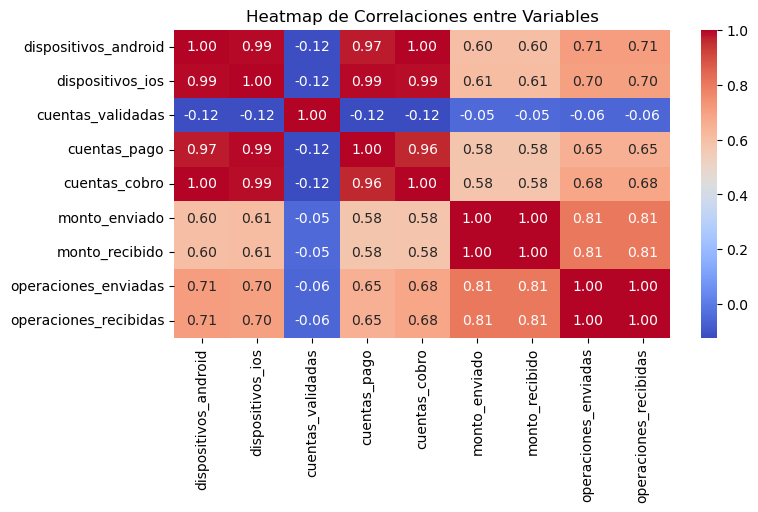

In [106]:
# Matriz de correlaciones
correlaciones = df_final_clean[columnas_numericas].corr()

plt.figure(figsize=(8,4))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlaciones entre Variables')
plt.show()


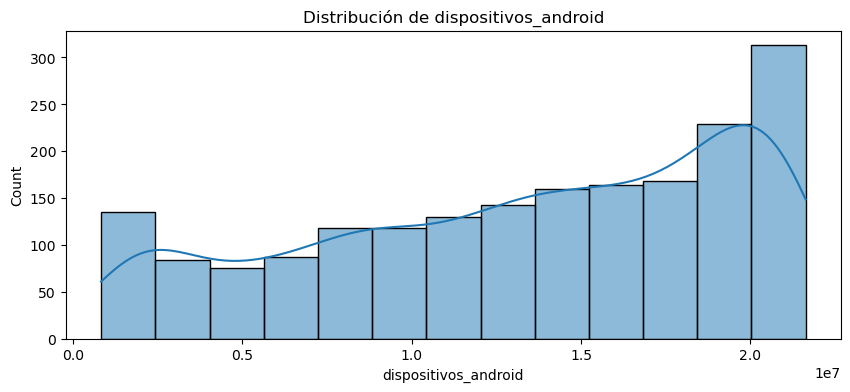

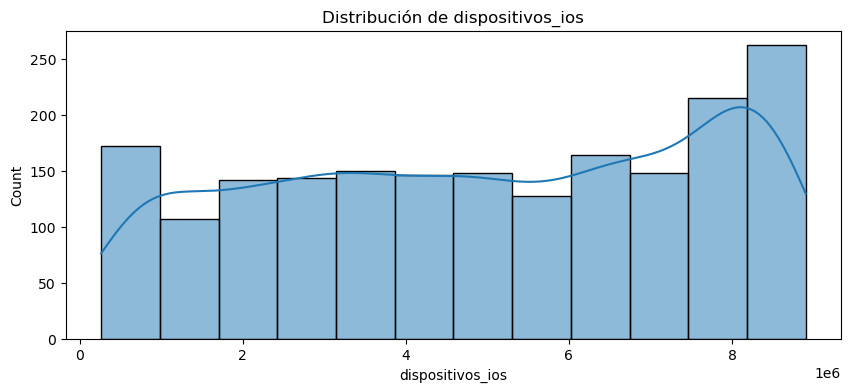

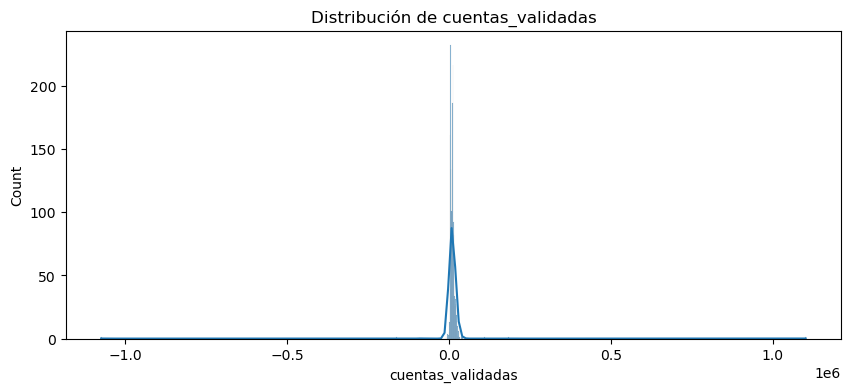

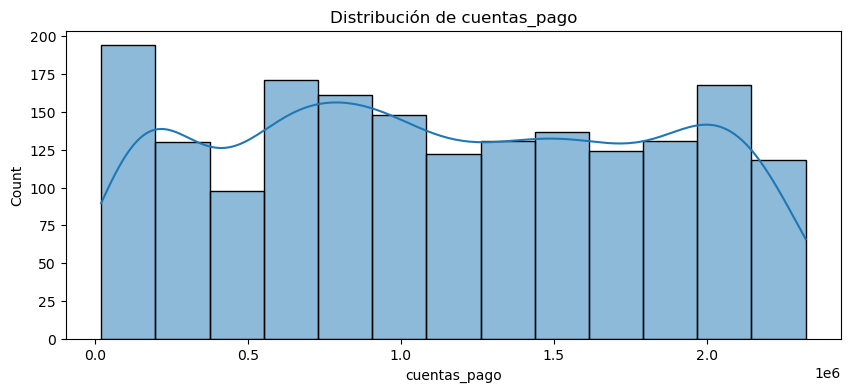

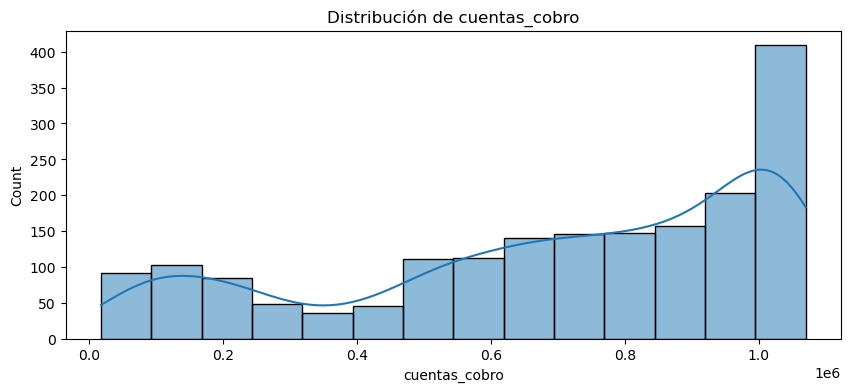

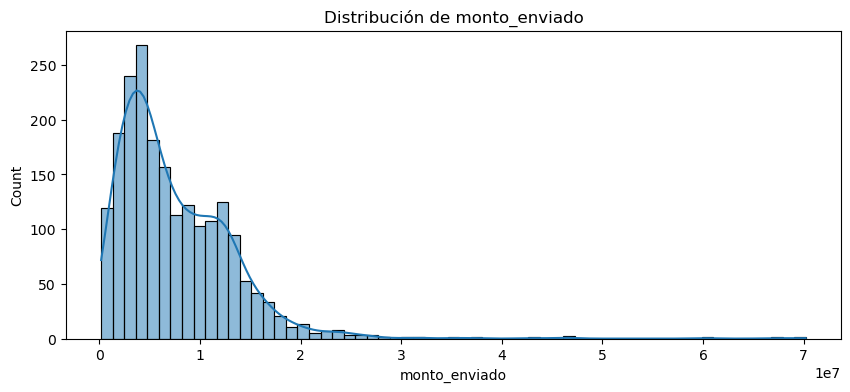

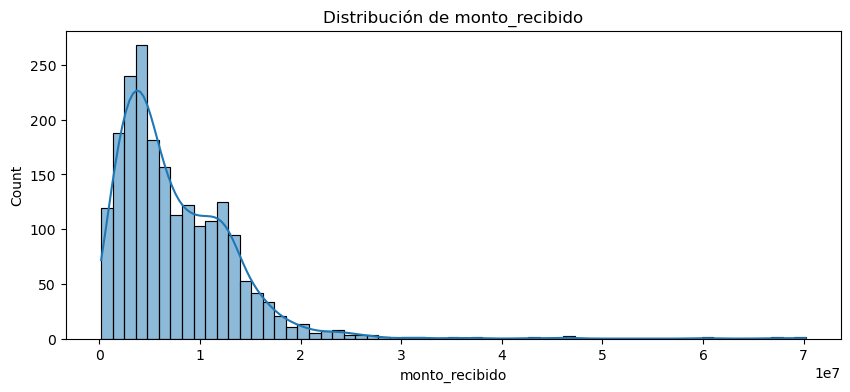

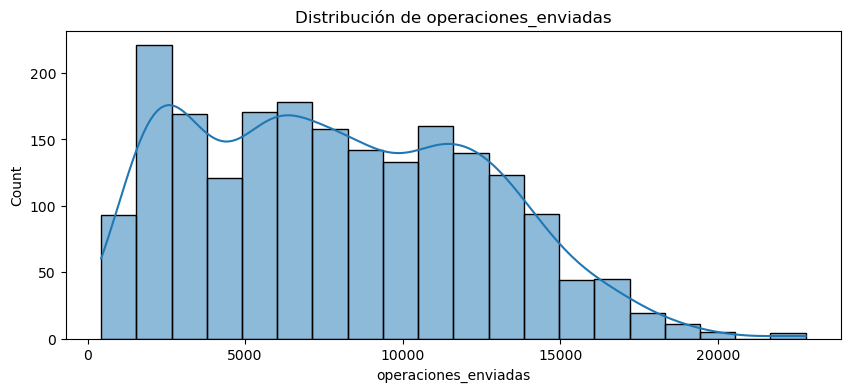

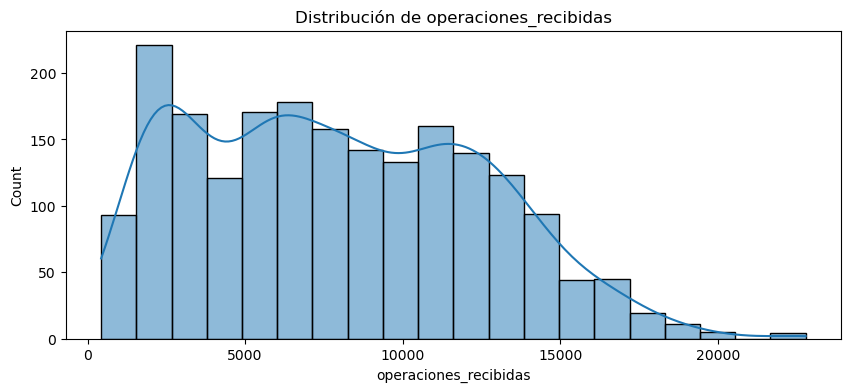

In [105]:
# Gráficas de distribución para cada variable
for col in columnas_numericas:
    plt.figure(figsize=(10,4))
    sns.histplot(df_final_clean[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


In [107]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definimos fórmula de modelo
formula = "monto_enviado ~ dispositivos_android + dispositivos_ios + operaciones_enviadas + operaciones_recibidas"

# Preparamos modelo Gamma
modelo = smf.glm(formula=formula,
                 data=df_final_clean,
                 family=sm.families.Gamma(sm.families.links.log())
                 ).fit()

print(modelo.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          monto_enviado   No. Observations:                 1924
Model:                            GLM   Df Residuals:                     1920
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                         0.11973
Method:                          IRLS   Log-Likelihood:                -30636.
Date:                Sun, 27 Apr 2025   Deviance:                       195.66
Time:                        16:51:54   Pearson chi2:                     230.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9604
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.29

/opt/homebrew/Caskroom/miniconda/base/envs/arquitectura/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [108]:
# Variables predictoras
X_vars = [
    'dispositivos_android',
    'dispositivos_ios',
    'operaciones_enviadas',
    'operaciones_recibidas'
]

# Variable objetivo
y_var = 'monto_enviado'

# Creamos X y y
X = df_final_clean[X_vars]
y = df_final_clean[y_var]

# Opcional: eliminar filas que tengan NaN en X o y
datos_modelo = pd.concat([X, y], axis=1).dropna()

X = datos_modelo[X_vars]
y = datos_modelo[y_var]

print(f"✅ Datos preparados: {X.shape[0]} filas")


✅ Datos preparados: 1924 filas


In [109]:
import statsmodels.api as sm

# Añadir intercepto
X = sm.add_constant(X)

# Definir y ajustar el modelo GLM (familia Gamma, link log)
glm_gamma = sm.GLM(y, X, family=sm.families.Gamma(sm.families.links.log()))
modelo_ajustado = glm_gamma.fit()

# Resumen del modelo
print(modelo_ajustado.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          monto_enviado   No. Observations:                 1924
Model:                            GLM   Df Residuals:                     1920
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                         0.11973
Method:                          IRLS   Log-Likelihood:                -30636.
Date:                Sun, 27 Apr 2025   Deviance:                       195.66
Time:                        16:53:57   Pearson chi2:                     230.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9604
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    14.29

/opt/homebrew/Caskroom/miniconda/base/envs/arquitectura/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [110]:
# Interpretación de efectos multiplicativos
import numpy as np

efectos_multiplicativos = np.exp(modelo_ajustado.params)
print("📈 Efectos Multiplicativos (exp(coef)):")
print(efectos_multiplicativos)


📈 Efectos Multiplicativos (exp(coef)):
const                    1.618314e+06
dispositivos_android     1.000000e+00
dispositivos_ios         9.999999e-01
operaciones_enviadas     1.000065e+00
operaciones_recibidas    1.000065e+00
dtype: float64


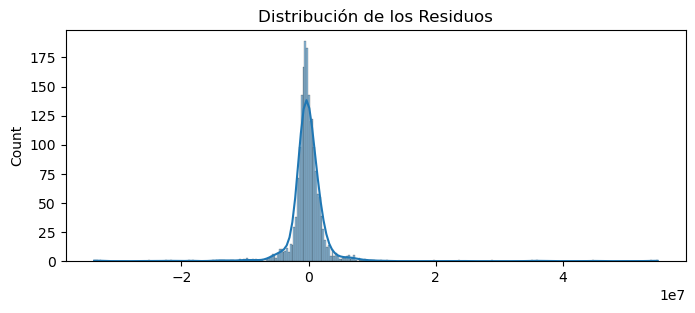

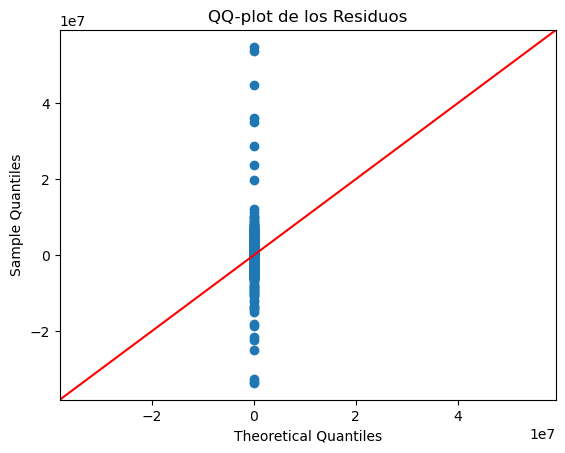

In [113]:
# Residuos
residuos = modelo_ajustado.resid_response

# Histograma de residuos
plt.figure(figsize=(8,3))
sns.histplot(residuos, kde=True)
plt.title("Distribución de los Residuos")
plt.show()

# QQ-plot para ver si los residuos siguen una Gamma (o al menos no son catastróficos)
sm.qqplot(residuos, line='45')
plt.title("QQ-plot de los Residuos")
plt.show()


In [114]:
# Creamos una copia para trabajar seguro
df_modelo_log = df_final_clean.copy()

# Variables a transformar
X_vars = [
    'dispositivos_android',
    'dispositivos_ios',
    'operaciones_enviadas',
    'operaciones_recibidas'
]

# Aplicamos log(1+x) para evitar log(0)
for col in X_vars:
    df_modelo_log[f'log_{col}'] = np.log1p(df_modelo_log[col])

# Nueva lista de variables predictoras transformadas
X_vars_log = [f'log_{col}' for col in X_vars]


In [115]:
# Definir X e y
X = df_modelo_log[X_vars_log]
y = df_modelo_log['monto_enviado']

# Eliminar filas con NaN
datos_modelo = pd.concat([X, y], axis=1).dropna()
X = datos_modelo[X_vars_log]
y = datos_modelo['monto_enviado']

# Añadir intercepto
X = sm.add_constant(X)

# Ajustar modelo GLM Gamma
glm_gamma_log = sm.GLM(y, X, family=sm.families.Gamma(sm.families.links.log()))
modelo_log_ajustado = glm_gamma_log.fit()

# Mostrar resumen
print(modelo_log_ajustado.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          monto_enviado   No. Observations:                 1924
Model:                            GLM   Df Residuals:                     1920
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                         0.10740
Method:                          IRLS   Log-Likelihood:                -30471.
Date:                Sun, 27 Apr 2025   Deviance:                       162.95
Time:                        16:58:11   Pearson chi2:                     206.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.9767
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/opt/homebrew/Caskroom/miniconda/base/envs/arquitectura/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


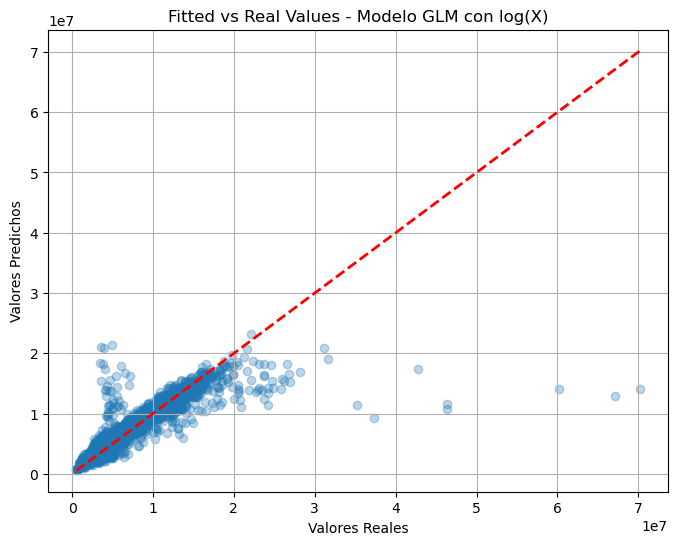

In [118]:
# Predicciones
fitted_values = modelo_log_ajustado.fittedvalues

# Graficar
plt.figure(figsize=(8,6))
plt.scatter(y, fitted_values, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Fitted vs Real Values - Modelo GLM con log(X)')
plt.grid(True)
plt.show()
